# 빅데이터 분석 기말고사 

## 1. 선형회귀에 대해 설명하고, 정규방정식을 통한 선형회귀와 경사하강법을 통한 선형회귀가 어떻게 다른지를 설명하세요. 또한 사이킷런에서 각 방법을 통해 해결할 시에 어떤 함수를 활용해야 하는지 답하세요.

선형회귀: 기본적인 직관으로 학습데이터가 있을 때 데이터를 잘 표현하는 선을 얻는 것.  -> 잘 표현한 기준: 제곱 오차 최소화
- 정규방정식을 통한 선형회귀: 제곱 오차를 최소화하기 위한 계수를 미분을 통해 찾는 방법
    - sklearn.linear_model.LinearRegression 활용
- 경사하강법을 통한 선형회귀: 'W_new = W_old - a * gradient'와 같은 경사하강법을 통해 손실함수 J를 최소화하는 계수를 찾는 방법
    - sklearn.linear_model.SGDRegressor 활용

## 2. 사이킷런의 당뇨병 데이터셋 분석 (선형회귀)

### 2. (a) 사이킷런을 통해 당뇨병 데이터셋을 불러와서 훈련 데이터와 테스트 데이터 셋을 2:1의 비율로 분할 하세요. (데이터프레임 형태로 피쳐와 목적 변수를 따로 지정하고 random_state는 1234로 하세요.)

In [230]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=1234)

### 2. (b) 표준정규화 스케일러를 통해 훈련 데이터를 기반으로 스케일러를 fit하고, 해당 스케일러를 통해 학습 데이터와 테스트 데이터를 스케일링 하세요. 

In [231]:
from sklearn.preprocessing import StandardScaler

# 표준 스케일링 (표준정규분포 따르도록)
scaler = StandardScaler()

# fit(): X_train 데이터를 이용해 스케일링에 필요한 평균과 표준편차를 계산
scaler.fit(X_train)   

X_train = scaler.transform(X_train)  # 스케일링
X_test  = scaler.transform(X_test)   # 스케일링

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

### 2. (c) 학습 데이터를 통해 목적 변수와 피처 사이의 관계를 선형회귀 모델로 학습 (정규방정식을 통한) 하고 테스트 데이터 셋에 대해 mean_absolute_error를 계산하세요.

In [232]:
import numpy as np 

n_train, n_test = X_train.shape[0], X_test.shape[0]

X_train = np.append(np.ones((n_train, 1)), X_train, axis=1)
X_test  = np.append(np.ones((n_test, 1)), X_test, axis=1)

w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train                    

y_pred = X_test @ w

print('학습 데이터셋 MAE:',np.abs(y_pred - y_test).mean())

학습 데이터셋 MAE: 43.00374425045685


### 2. (d) 위에서 획득한 선형회귀 모델 계수의 절댓값이 15가 넘는 계수에 해당하는 피처들에 대해서만, 또 다른 선형회귀 모델로 학습  (정규방정식을 통한) 하여 mean_absolute_error를 계산하세요.

In [234]:
print(w)

[150.85714286  -1.28888329 -13.73631203  23.80203652  15.97225675
 -35.21354691  19.98054577   4.64491946  10.6222712   34.52221499
   3.59542681]


In [235]:
# X_train, X_test 피처 선택
print(X_test.shape)
X_train = X_train[:, w>15]
X_test = X_test[:, w>15]

X_test.shape

(148, 11)


(148, 5)

In [236]:
w_2 = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train                    

y_pred = X_test @ w_2

print('학습 데이터셋 MAE:',np.abs(y_pred - y_test).mean())

학습 데이터셋 MAE: 43.355926608749265


## 3. 사이킷런의 당뇨병 데이터셋 분석2 (선형회귀)

### 3. (a) 사이킷런을 통해 당뇨병 데이터셋을 불러와서 훈련 데이터와 테스트 데이터 셋을 2:1의 비율로 분할 하세요. (넘파이 배열 형태로 피쳐와 목적 변수를 따로 지정하고 random_state는 1234로 하세요.)

In [241]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=1234)

### 3. (b) 최소 최대 스케일러를 통해 훈련 데이터를 기반으로 스케일러를 fit하고, 해당 스케일러를 통해 학습 데이터와 테스트 데이터를 스케일링 하세요. 

In [242]:
from sklearn.preprocessing import MinMaxScaler

# 최소-최대 스케일링
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 3. (c) 경사하강법을 통한 선형회귀를 고려할 때, 아래 주어진 선형 모델의 계수 W와 절편 b에 대해, 학습 데이터의 현재 손실함수 값을 계산하세요.

In [243]:
W, b =np.random.normal(0,1,10).reshape(-1,1),1

W.shape

(10, 1)

In [244]:
hypothesis = np.dot(X_train, W) + b   # 가설함수로 예측값 구하기 
diff       = hypothesis - y_train     # 예측값과 실제값의 차이 
loss       = np.sum(diff ** 2) / X_train.shape[0] # 손실함수

loss

8455447.405144535

### 3. (d) 학습 데이터를 통해 목적 변수와 피처 사이의 관계를 선형회귀 모델로 학습 (경사하강법) 하고 테스트 데이터 셋에 대해 mean_absolute_error를 계산하세요. (penalty 옵션은 None, 최대 반복횟수는 10000, learning_rate 옵션은 'constant', 학습율 (learning rate)는 0.05, random_state는 1234 로 하세요)

In [245]:
from sklearn.linear_model import SGDRegressor

reg = SGDRegressor(penalty=None, max_iter=10000, learning_rate='constant', eta0=0.05, random_state=1234)
reg = reg.fit(X_train, y_train)     # 학습 (제곱오차 최소화하도록 계수(w) 업데이트 by 경사하강법)

# 테스트 데이터의 예측값과 손실값의 차이의 절댓값의 평균 (MAE)
y_pred = reg.predict(X_test)    # 테스트 데이터의 예측값
print('테스트 데이터셋 MAE:',np.abs(y_pred - y_test).mean())

테스트 데이터셋 MAE: 54.059575687640894


## 4. 라쏘 회귀, 릿지 회귀에 대해서 설명하세요.

라쏘 회귀와 릿지 회귀는 선형회귀의 과대적합을 막아주는 정규화기법을 포함한 회귀이다. 가설함수의 계수에 놈을 추가하여 복잡해지지 않도록 하였다.
- 라쏘 회귀 : 선형 회귀 + L1 정규화 
- 릿지 회귀 : 선형 회귀 + L2 정규화

## 5 advertising 데이터 분석 (라쏘회귀)

### 5. (a) advertising1.csv와 advertising2.csv를 판다스의 read_csv를 통해서 load하여  advertising1, advertising2의 이름으로 할당하세요. 또한 두 데이터를 advertising의 이름으로 병합하세요, 병합 시에 ignore_index 옵션을 활용하여, 0~199까지 되게 하세요. 

In [246]:
import pandas as pd

advertising1 = pd.read_csv('advertising1.csv')
advertising2 = pd.read_csv('advertising2.csv')

advertising = pd.concat([advertising1, advertising2], ignore_index=True)
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### 5.(b) advertising의 Sales 피처가 목적변수로 하고,  훈련 데이터와 테스트 데이터 셋을 2:1의 비율로 분할 하세요. random_state는 1234로 하세요.)

In [247]:
sales = np.array(advertising.loc[:,"Sales"])
advertising = advertising.iloc[:,:3]

X_train, X_test, y_train, y_test = train_test_split(advertising, sales,test_size=1/3,random_state=1234)

advertising

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


### 5.(c) 최소최대 스케일러와 라쏘 회귀 (교차검증을 통해 가장 좋은 정규화 가중치 값을 찾는 라쏘회귀) 함수를 통해 파이프라인 객체를 생성하세요. (이 때, 정규화 가중치 텀의 후보군은 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100으로 하고 교차 검증 수는 30회로 하세요.)

In [248]:
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline

scaler = MinMaxScaler()
reg    = LassoCV(alphas=[0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100],cv=30)
pipe   = Pipeline(steps=[("scaler", scaler), ("reg", reg)])
pipe

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('reg',
                 LassoCV(alphas=[0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100],
                         cv=30))])

### 5.(d) 생성한 파이프라인 객체를 학습하고, 파이프라인 객체를 통해 테스트 데이터셋을 예측하여 mean_absolute_error를 계산하세요. 또한 학습된 후 최적의 정규화 가중치 값과 선형 모델의 계수를 확인하세요.

In [249]:
pipe   = pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(f'MAE:{(np.abs(y_pred - y_test)).mean(): .3f}')

print('최적의 alpha:', reg.alpha_)
print(f'계수: {reg.coef_}')

MAE: 1.283
최적의 alpha: 0.01
계수: [15.42109017  5.24039915 -0.        ]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

### 5. (e) 선형 모델의 계수를 바탕으로 Sales 피처와 다른 피처들 사이의 관계에 대해 설명하세요.

In [250]:
print(f'계수: {reg.coef_}')
X_train.columns

계수: [15.42109017  5.24039915 -0.        ]


Index(['TV', 'Radio', 'Newspaper'], dtype='object')

- TV의 계수가 양수의 값이고 가장 크므로 TV의 증가가 Sales의 증가에 가장 많은 양의 영향을 준다.
- Radio 또한 5.24039915로 양수의 계수를 가지므로 Radio의 증가가 Sales의 증가에 양의 영향을 주지만, TV보단 영향을 덜준다.
- Newspaper는 -0.의 계수를 가지므로 Newspaper의 변화는 Sales에 거의 영향을 주지 않는다.

## 6. 사이킷런의 유방암 데이터 분석 (로지스틱 회귀)

### 6. (a) 사이킷런을 통해 유방암 데이터셋을 불러와서 훈련 데이터와 테스트 데이터 셋을 2:1의 비율로 분할 하세요. (데이터프레임 형태로 피쳐와 목적 변수를 따로 지정하고 random_state는 1234로 하세요.)

In [253]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=1234)
set(y_train)

{0, 1}

### 6. (b) 표준정규화 스케일러를 통해 훈련 데이터를 기반으로 스케일러를 fit하고, 해당 스케일러를 통해 학습 데이터와 테스트 데이터를 스케일링 하세요. 

In [254]:
scaler = StandardScaler()

# fit(): X_train 데이터를 이용해 스케일링에 필요한 평균과 표준편차를 계산
scaler.fit(X_train)   

X_train = scaler.transform(X_train)  # 스케일링
X_test  = scaler.transform(X_test)   # 스케일링

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

### 6. (c) 경사하강법을 통한 로지스틱 회귀를 고려할 때, 아래 주어진 선형 모델의 계수 W와 절편 b에 대해, 학습 데이터의 현재 손실함수 값을 계산하세요. (sigmoid와 cross_entropy를 활용하세요, 또한 A.reshape(-1)을 활용하면 A를 하나의 차원을 갖도록 할 수 있습니다.)

In [255]:
import numpy as np

W, b =np.random.normal(0,1,30).reshape(-1,1), 0

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def cross_entropy(p, q):
    return -np.sum(p * np.log(q))

In [256]:
def hypothesis_function(x,theta, b):
    z = np.dot(-x,theta) - b    # 릿지 
    return sigmoid(z)       # 릿지 + 시그모이드

def compute_cost(x,y,theta,b):
    m = y.shape[0]  # 데이터 수
    J = (1/m)*(cross_entropy(y,hypothesis_function(x,theta,b))+cross_entropy(1-y,1-hypothesis_function(x,theta,b)))
    return J

In [257]:
y_train, y_test = np.array(y_train).reshape(-1), np.array(y_test).reshape(-1)
loss = compute_cost(X_train, y_train, W, b)
loss

856.6137788032179

### 6. (d) 학습 데이터를 통해 목적 변수와 피처 사이의 관계를 로지스틱 회귀 모델로 학습하고 테스트 데이터 셋에 대해 예측 정확도를 계산하세요. (solver 옵션은 'sag', penalty 옵션은 'none',  random_state는 1234, 최대 반복횟수는 1000으로 하세요)

In [258]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=1234, max_iter=1000, solver='sag', penalty=None)   

clf          = clf.fit(X_train, y_train)    # 학습
y_pred       = clf.predict(X_test) 
print(f'테스트 데이터셋 정확도:{(y_test == y_pred).sum() / len(y_test) * 100: .2f}%')

테스트 데이터셋 정확도: 96.32%


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## 7. 트리모델에서 ID3 알고리즘, C4.5알고리즘, CART 알고리즘에 대해 각각 설명하세요.

- ID3: 톱다운 방식으로 반복하여 데이터를 나누며 현재 상태에서 최적화하는 알고리즘.
    - 분류속성은 엔트로피를 사용하여 정복이득을 계산하여 결정. 정보이득이 가장 큰 분할 속성으로 결정.
- C4.5: ID3에서 분류속성을 결정하는 기준이었던 정보이득을 개선한 알고리즘.  
    - 정보이득 대신 정보 이득에 속성의 그룹 엔트로피를 나눈 값을 기준으로 분할속성을 결정
    - 이를 통해 너무 다양한 속성 값(e.g.학번)을 가지면 낮은 정보이득값을 갖게함.
- CART: ID3에서 분류속성을 결정하는 기준을 지니지수를 채택하여 개선한 알고리즘.
    - ID3와 달리 이진분할을 실시
    - 지니지수 또한 불순도를 측정하는 지표로 지니지수가 작을수록 불순도가 낮고 좋은 분포를 말함.

## 8. 트리 모델에서 목적변수가 연속적인 값을 갖는 변수일 경우, 이산적인 값을 갖을 때에 비해서 분기 및 예측에 있어서 어떤 점이 달라지는 지 설명하세요.

목적변수가 이산적인 값을 가질 땐 해당 목적변수의 모든 종류(클래스)를 기준으로 데이터를 나눌 수 있었다.  

하지만 목적변수가 연속적인 경우에 모든 데이터를 기준으로 하여 데이터를 나누면 너무 많은 기준점이 생겨 과대적합이 되는 문제가 발생한다.  
통계적 수치로 중위값이나 4분위수를 기준점으로 나누는 방식도 제안되었지만 이렇게 분할할시엔 과소적합 문제가 발생한다.  

그러므로 목적변수가 연속적인 경우엔 목적변수의 값이 변할 때를 기준점으로 삼아 분할하는 방식을 사용한다. 해당 기준점은 경계값들의 평균을 의미한다.  
여러 기준점 중에서 각 기준점대로 분할했을 때,가장 큰 정보이득(표준화된정보이득, 지니지수)을 얻는 기준점을 찾아서 해당 기준점을 분할 속성의 기준으로 결정한다.


## 9. MNIST (손글씨 데이터셋) 분석

### 9. (a) 사이킷런을 통해 손글씨 데이터셋을 불러와서 훈련 데이터와 테스트 데이터 셋을 2:1의 비율로 분할 하세요. (데이터프레임 형태로 피쳐와 목적 변수를 따로 지정하고 random_state는 1234로 하세요.)

In [260]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=1234)

### 9.(b) 최소최대 스케일러와 의사결정트리 함수를 통해 파이프라인 객체를 생성하세요. (의사결정트리의 분류 기준은 엔트로피, 트리의 최대깊이는 30, 잎 노드의 최소 데이터 개수는 3개, random_state는 1234로 하세요. )

In [261]:
from sklearn.tree import DecisionTreeClassifier

scaler = MinMaxScaler()
reg    = DecisionTreeClassifier(criterion='entropy',
                            random_state=1234,
                            max_depth=30,
                            min_samples_leaf=3)
pipe = Pipeline(steps=[("scaler", scaler), ("reg", reg)])

pipe

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('reg',
                 DecisionTreeClassifier(criterion='entropy', max_depth=30,
                                        min_samples_leaf=3,
                                        random_state=1234))])

### 9.(c) 생성한 파이프라인 객체를 학습하고, 파이프라인 객체를 통해 테스트 데이터셋을 예측하여 정확도를 계산하세요. 

In [262]:
pipe = pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print(f'테스트 데이터셋 정확도:{(y_test == y_pred).sum() / len(y_test) * 100: .2f}%')

테스트 데이터셋 정확도: 85.64%


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

### 9. (d) 생성된 트리모델을 그림으로 나타내세요.

[Text(0.5498724489795919, 0.9545454545454546, 'x[42] <= 0.469\nentropy = 3.321\nsamples = 1198\nvalue = [123, 118, 119, 121, 110, 114, 124, 123, 119, 127]'),
 Text(0.32040816326530613, 0.8636363636363636, 'x[43] <= 0.219\nentropy = 2.878\nsamples = 649\nvalue = [3, 76, 80, 115, 25, 108, 1, 90, 26, 125]'),
 Text(0.1663265306122449, 0.7727272727272727, 'x[26] <= 0.594\nentropy = 2.228\nsamples = 347\nvalue = [3, 29, 4, 103, 7, 72, 0, 9, 1, 119]'),
 Text(0.09795918367346938, 0.6818181818181818, 'x[30] <= 0.1\nentropy = 1.647\nsamples = 174\nvalue = [3, 15, 4, 100, 0, 1, 0, 3, 0, 48]'),
 Text(0.0653061224489796, 0.5909090909090909, 'x[19] <= 0.531\nentropy = 1.205\nsamples = 131\nvalue = [0, 13, 4, 100, 0, 1, 0, 1, 0, 12]'),
 Text(0.0326530612244898, 0.5, 'x[29] <= 0.844\nentropy = 0.618\nsamples = 104\nvalue = [0, 0, 3, 93, 0, 0, 0, 1, 0, 7]'),
 Text(0.0163265306122449, 0.4090909090909091, 'x[45] <= 0.25\nentropy = 0.171\nsamples = 93\nvalue = [0, 0, 1, 91, 0, 0, 0, 1, 0, 0]'),
 Text(0.00

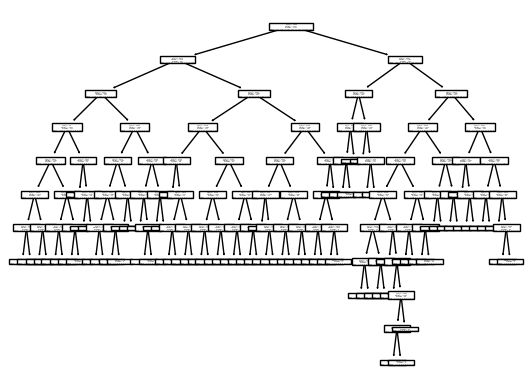

In [263]:
from sklearn import tree

tree.plot_tree(reg)